<a href="https://colab.research.google.com/github/ludawg44/jigsawlabs/blob/master/Copy_of_4_different_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Types of Plot in Matplotlib

### Introduction

In the last lesson, we dug into the different components of matplotlib.  And we saw that a figure contains one or more axes, and each axes can have multiple plots.  Now the main component that we'll be working with are the plots.  In this lesson, we'll explore some of the various plot types we can create.

### Why plot

Before showing how these plots work in matplotlib, it's worth a brief discussion as to what we are using these plots for in the first place.

Here's some broad categories of plots we can create.

1. Distributions
    * We can use distributions to describe the data (center, spread, and shape)
    * Use distributions to get an overview of the data quality and inclusiveness of the data
2. Grouping and Aggregating 
    * How can we compare aggregate statistics (count, average) across categorical variables in the data
    * Does the breakdown of our data match what we expect in the broader population
3. Scatter Plots Plots 
    * How correlated is one variable with another
    * Are there differences between categories in the data

### Loading the Data and Matplotlib 

Let's load our data from the `imdb_movies` dataset and take a look.

In [0]:
import pandas as pd
url = "https://raw.githubusercontent.com/jigsawlabs-student/matplotlib/master/imdb_movies.csv?token=AADXLBKU6UDM5ZL5JPDAZTC6QNGEM"
df = pd.read_csv(url)

In [0]:
cols = df.columns
cols

Index(['title', 'genre', 'budget', 'runtime', 'year', 'month', 'revenue'], dtype='object')

In [0]:
movies = df.to_numpy()
movies[:2]

array([['Avatar', 'Action', 237000000, 162.0, 2009, 12, 2787965087],
       ["Pirates of the Caribbean: At World's End", 'Adventure',
        300000000, 169.0, 2007, 5, 961000000]], dtype=object)

So above, we can get a general sense of the data we'll be working with.

> Next, let's load up `matplotlib`.

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

### Distributions

Let's start by getting an overview of the range of years that our movies come from.  To do so, we can use a histogram.

In [0]:
years = movies[:, 4]

(array([  1.,   0.,   1.,   4.,   5.,  47.,  89., 408., 744., 701.]),
 array([1940.0, 1947.6, 1955.2, 1962.8, 1970.4, 1978.0, 1985.6, 1993.2,
        2000.8, 2008.4, 2016.0], dtype=object),
 <a list of 10 Patch objects>)

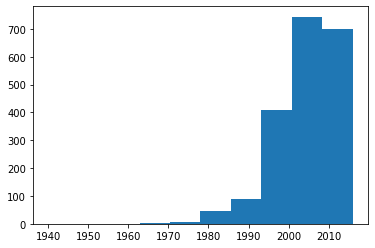

In [0]:
fig = plt.figure()
# we'll explain add_subplot(111) in a future lesson
ax = fig.add_subplot(111)
ax.hist(years)

So from the above, we can see that many of the movies of the dataset are from after the year 2000.  Notice that with the histogram plot, we can set the number of bins in the data, as well as the range to change the plot.

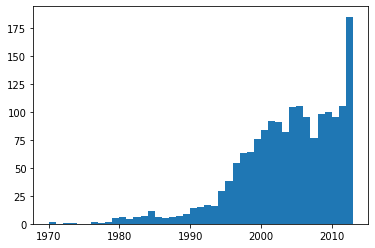

In [0]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(years, range=[1970, 2013], bins = 2013 - 1970)
# we add print('') to avoid the display of the data before the fig
print('')

### Grouping by Categories

> We'll cover how to perform different metrics with groups more extensively in pandas, for right now, let's simply plot counts.

In [0]:
cats_and_counts = np.unique(movies[~pd.isnull(movies[:, 1])][:, 1], return_counts = True)
cats = cats_and_counts[0]
counts = cats_and_counts[1]

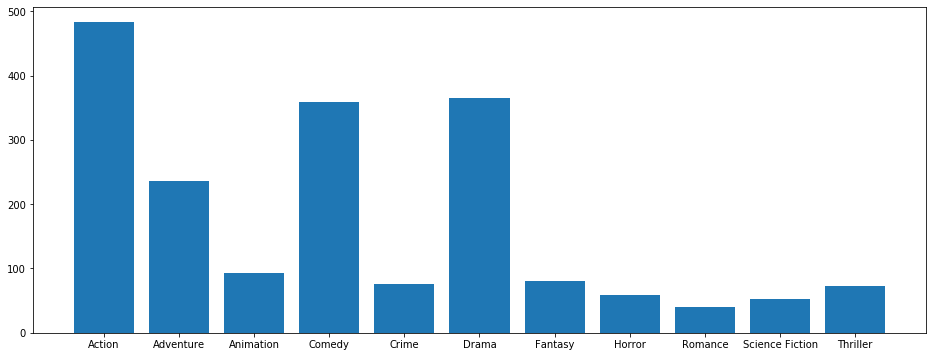

In [0]:
plt.bar(cats, counts)
fig = plt.gcf()
fig.set_size_inches(16, 6)

Note that we can also plot our information horizontally with `barh`.

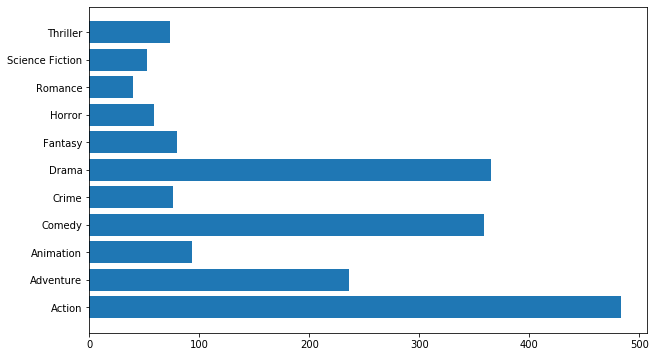

In [0]:
plt.barh(cats, counts)
fig = plt.gcf()
fig.set_size_inches(10, 6)

### Scatter plots and Line Plots 

Finally, with scatter plots we can get a sense of relationships between variables.

In [0]:
cols

Index(['title', 'genre', 'budget', 'runtime', 'year', 'month', 'revenue'], dtype='object')

In [0]:
budgets = movies[:, 2]
revenues = movies[:, -1]

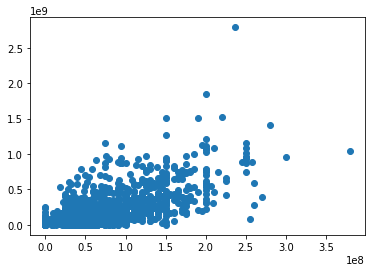

In [0]:
plt.scatter(x = budgets, y = revenues)

For line plots we can call the `plot` function.

> Notice that the plot function does not take any keyword arguments.

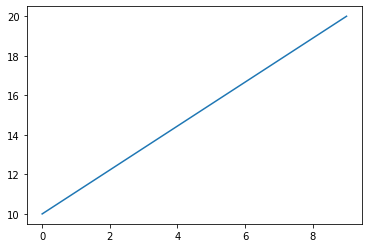

In [0]:
plt.plot(np.arange(10), np.linspace(10, 20, 10))

### Comparing Categories

Note that we can plot two histograms on the same subplot to compare data.

In [0]:
action_movies = movies[movies[:, 1] == 'Action']
drama_movies = movies[movies[:, 1] == 'Drama']
action_budgets = action_movies[:, 2]
action_revenues = action_movies[:, -1]

drama_budgets = drama_movies[:, 2]
drama_revenues = drama_movies[:, -1]

none


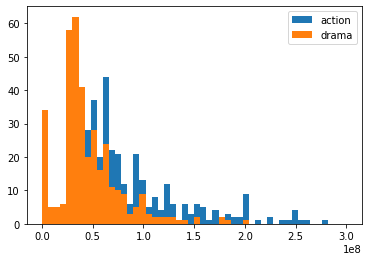

In [0]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(action_budgets, bins = 50, range=[0, 300000000], label = 'action')
ax.hist(drama_budgets, bins = 50, range=[0, 300000000], label = 'drama')
ax.legend(loc='best')
print('none')

> For example, above we see that action movies have eanred more than drama movies.  

### Resources

[Dunder Data Matplotlib](https://github.com/DunderData/Tutorials/blob/master/Data%20Analysis%20and%20Visualization%20Tutorials/Matplotlib%20Tutorials/1.%20Matplotlib%20Fundamentals.ipynb)